# xgBoost : RTT augmented Dataset

In [1]:
!pip install roundtrip

     |████████████████████████████████| 102kB 5.1MB/s 
     |████████████████████████████████| 512kB 10.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 276kB 16.2MB/s 
     |████████████████████████████████| 122kB 18.5MB/s 
  Created wheel for roundtrip: filename=roundtrip-0.1.1-cp36-none-any.whl size=3000 sha256=32fffd65f92b6f7458af65ed3023c1c1cf090b685330c769da987c819b53b03d
  Stored in directory: /root/.cache/pip/wheels/ef/41/ac/e8e129e66ad68bfda0a9241c3fdbac3a272404a5468a0d5006
  Created wheel for mtranslate: filename=mtranslate-1.8-cp36-none-any.whl size=3695 sha256=92fc212bdf87bebd42c5e2ca97e6a074dd26add6d0726754217da8b9db015284
  Stored in directory: /root/.cache/pip/wheels/eb/fb/4a/f63e74cbfb835161f3f2d1a6b607b137d344a5cb6d8c1303fa
  Created wheel for proto-plus: filename=proto_plus-1.13.0-cp36-none-any.whl size=41592 sha256=05dfd73daa46b39d3f1efaf1dafa431a7fe5ed7718b27df

In [2]:
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=5726d805413fd723a5305f28277c1880015467b1f8aa50b1e86504a91bae650d
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#https://stackoverflow.com/questions/62117483/import-module-in-google-colab-from-google-drive-python
sys.path.append('/content/gdrive/MyDrive/CS--2/')
#import module_1_xml_to_df
#from module_1_xml_to_df import convert_xml_to_DataFrame
from module_2_preprocessing import Data_Preprocessing

Uninstalling nltk-3.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/nltk-3.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/nltk/*
Proceed (y/n)? y
  Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 1.4MB 7.9MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=9a1e258f6701937a6b61cfbc2d0cad426f2b757a4848977755f1b919271e34c6
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


{'his', 'being', 'will', 'theirs', "you'd", "should've", 'is', 'just', 'so', 'll', 'ma', 'needn', 'at', "shouldn't", 'am', 'down', 'its', 'my', 'where', 'haven', 'more', 'has', 'any', 'their', 'herself', 'out', 'each', 'myself', 'doing', 'than', 'that', 'are', "hasn't", 'them', 'own', 'both', 'against', "isn't", 'he', "hadn't", 'hadn', 'nor', 'should', 'most', 'there', 'these', 'does', 'over', 'we', 'which', 'such', 'until', 'then', "don't", 'into', 'o', "doesn't", 'she', 'ourselves', 'with', 'aren', "weren't", 'been', "couldn't", 'below', 'yours', 'no', 'itself', 'in', 'shouldn', 'once', 'not', 'how', 'wasn', "didn't", 'i', 'her', 'y', "it's", 'before', 'now', 'very', "you'll", "she's", 'they', "you're", 'did', "that'll", 'mightn', 'what', 'can', 'this', 'on', 'do', 'mustn', 'm', 'if', 'above', 'be', 'further', 'and', 'isn', 's', 'it', 'the', "aren't", 'shan', 'but', 'have', 't', 'you', 'himself', 'while', 'about', 'by', 'him', 'here', "mightn't", "wouldn't", 're', 'under', 'was', 'yo

In [5]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics  
import xgboost as xgb 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

### 1. laoding calss data_augmentation_with_RTT

In [6]:
class data_augmentation_with_RTT:
  def __init__(self,per):
    self.per = per

  #https://github.com/samhavens/roundtrip
  def RTT_function(self , dataset , len_of_aug_data) :
      col_name = dataset.columns
      for r in range(0,len_of_aug_data):
        dataset=shuffle(dataset)
        sentence = backtranslate(dataset[col_name[1]][r], "de")
        aspect_term = dataset[col_name[2]][r] 
        aspect_cat = dataset[col_name[3]][r]
        label = dataset[col_name[4]][r]
        #print(sentence)
        new_data = pd.DataFrame([[sentence,aspect_term, aspect_cat , label]],columns=['text', 'aspect_term', 'aspect_category', 'polarity'])
        #print(new_data)
        dataset = dataset.append(new_data, ignore_index=True)
        #print(dataset.shape)
      return dataset

  def augmentation(self , data):
    if type(data) == pd.core.series.Series:                     # if the givne datatype is series or list or numpy array
      data = pd.DataFrame(data)                                 # it will get converted into standard Dataframe format
    elif type(data) == list or type(data) == np.ndarray:        # for further calculations
      data = pd.DataFrame(data = data)
    else:
      pass
    
    len_of_data = data.shape[0]
    partition = int((self.per /100)*len_of_data)

    data = shuffle(data)
    data = self.RTT_function(data , partition)
    
    return data  

## 2.Loading the data

In [7]:
restaurant_data = pd.read_csv("/content/gdrive/MyDrive/CS--2/restaurant_train_data_semeval_14.csv")

In [8]:
restaurant_data.shape

(3044, 5)

In [ ]:
da = data_augmentation_with_RTT(per= 100)

In [ ]:
augmented_data_restaurant = da.augmentation(restaurant_data )

In [ ]:
# saving the dataframe 
augmented_data_restaurant.to_csv('/content/gdrive/MyDrive/CS--2/augmented_data_restaurant.csv',index= False) 

## 3. Loading the RTT augmented data

In [10]:
augmented_data_restaurant = pd.read_csv("/content/gdrive/MyDrive/CS--2/augmented_data_restaurant.csv")

In [11]:
augmented_data_restaurant.head()

,id,text,aspect_term,aspect_category,polarity
0,NaN,"As a result, their burgers fell apart in their...",burgers,anecdotes/miscellaneous,negative
1,2064.0,we split a tasty vegetable samosa and the mala...,malai tikka wrap,food,positive
2,NaN,"In the summer of 2003, however, the management...",glass front,ambience,negative
3,NaN,I would go back.,anecdotes/miscellaneous,anecdotes/miscellaneous,positive
4,667.0,prices are in line.,Prices,price,neutral


In [12]:
augmented_data_restaurant.shape

(6088, 5)

In [13]:
augmented_data_restaurant.groupby('aspect_category').size().sort_values(ascending=False)

aspect_category
anecdotes/miscellaneous    2111
food                       1753
service                     880
ambience                    773
price                       571
dtype: int64

In [14]:
catagories = augmented_data_restaurant['aspect_category'].unique()
catagories , len(catagories)

(array(['anecdotes/miscellaneous', 'food', 'ambience', 'price', 'service'],
       dtype=object), 5)

In [15]:
polarity = augmented_data_restaurant['polarity'].unique()
polarity

array(['negative', 'positive', 'neutral', 'conflict'], dtype=object)

## 4. Aspect Based Sentiment Analysis

In [16]:
X = augmented_data_restaurant['text']
Y = augmented_data_restaurant['aspect_category']

### 4.1 Splitting the data 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


In [20]:
dp = Data_Preprocessing()

In [21]:
X_train_review = dp.preprocess_text(X_train)

100%|██████████| 4870/4870 [00:03<00:00, 1455.35it/s]


In [22]:
X_test_review = dp.preprocess_text(X_test)

100%|██████████| 1218/1218 [00:00<00:00, 2710.78it/s]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer    
vectorizer_sit = CountVectorizer(min_df=3,max_features=50000)  
vectorizer_sit.fit(X_train_review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=50000, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
preprocessed_train_review = vectorizer_sit.transform(X_train_review).toarray()    # produces a sparse representation of preprocessed sentences
print("Shape of matrix data after one hot encoding for train: ",preprocessed_train_review .shape)

Shape of matrix data after one hot encoding for train:  (4870, 1954)


In [25]:
preprocessed_test_review = vectorizer_sit.transform(X_test_review).toarray()    
print("Shape of matrix data after one hot encoding for train: ",preprocessed_test_review.shape)

Shape of matrix data after one hot encoding for train:  (1218, 1954)


### 4.2 xgbbost model

In [26]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [28]:
# making predictions on the testing set 
y_pred_cat = reg.predict(preprocessed_test_review)

In [29]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

75.70841889117042

In [30]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 

metrics.accuracy_score(y_test, y_pred_cat)*100

72.41379310344827

### 4.3 classification report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat ,target_names= catagories))

                         precision    recall  f1-score   support

anecdotes/miscellaneous       0.90      0.43      0.58       164
                   food       0.68      0.90      0.77       432
               ambience       0.71      0.75      0.73       324
                  price       0.87      0.54      0.67       112
                service       0.78      0.65      0.71       186

               accuracy                           0.72      1218
              macro avg       0.79      0.65      0.69      1218
           weighted avg       0.75      0.72      0.72      1218



### Observation : 
This is the classification report of aspect category based sentiment model showing the orecision, recall, f1_score and support values for all 5 unique catagories with accuracy 72 percent 

### 4.4 Confusion matrix

In [33]:
# code borrowed from Microsoft Malware Detection Assignment
def plot_confusion_matrix(test_y, predict_y ,labels):
    C = confusion_matrix(test_y, predict_y)      # calculation of confusion matrix 
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y))    # number of misclassified points while predicting y
 
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))

    labels = labels                 
    cmap=sns.light_palette("purple")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix" , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in recall matrix",A.sum(axis=1))

Number of misclassified points  0.27586206896551724
-------------------------------------------------- Confusion matrix --------------------------------------------------


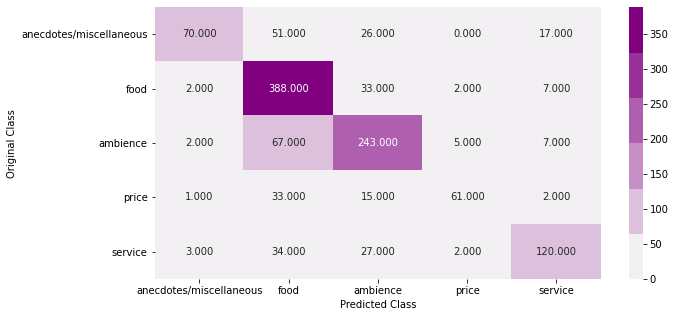

-------------------------------------------------- Precision matrix --------------------------------------------------


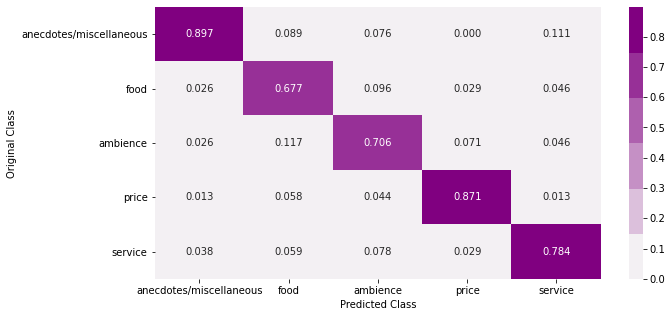

Sum of columns in precision matrix [1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


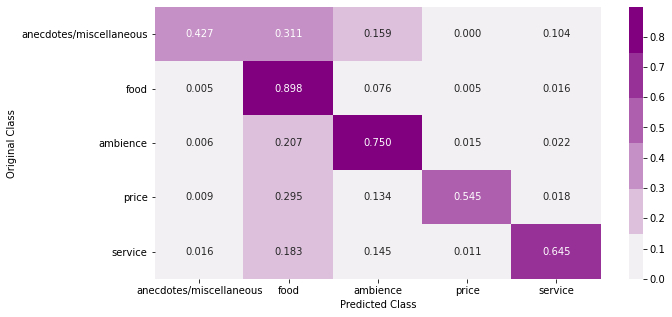

Sum of rows in recall matrix [1. 1. 1. 1. 1.]


In [34]:
plot_confusion_matrix(y_test,  y_pred_cat, catagories)

## 5. Polarity Based Sentiment Model

In [36]:
X = augmented_data_restaurant['text']
Y = augmented_data_restaurant['polarity']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4870,) (4870,)
(1218,) (1218,)


### 5.1 xgboost model

In [39]:
reg = xgb.XGBClassifier() 
reg.fit(preprocessed_train_review, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
# making predictions on the training set 
y_pred_train = reg.predict(preprocessed_train_review)

In [41]:
# making predictions on the testing set 
y_pred_polarity = reg.predict(preprocessed_test_review)

In [42]:
# comparing actual response values (y_train) with predicted response values (y_pred_train) 
 
metrics.accuracy_score(y_train, y_pred_train)*100

69.73305954825462

In [43]:
metrics.accuracy_score(y_test, y_pred_polarity)*100

65.1888341543514

### 5.2. classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_polarity ,target_names= polarity))

              precision    recall  f1-score   support

    negative       0.79      0.26      0.39        74
    positive       0.64      0.34      0.44       281
     neutral       0.87      0.12      0.21       171
    conflict       0.65      0.95      0.77       692

    accuracy                           0.65      1218
   macro avg       0.74      0.42      0.45      1218
weighted avg       0.68      0.65      0.59      1218



### 5.3 Confusion matrix

Number of misclassified points  0.34811165845648606
-------------------------------------------------- Confusion matrix --------------------------------------------------


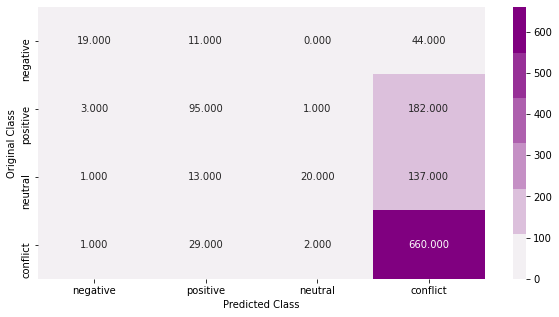

-------------------------------------------------- Precision matrix --------------------------------------------------


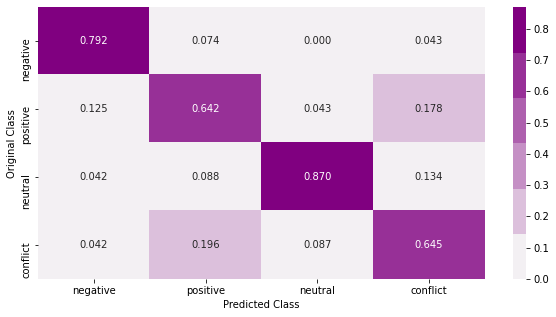

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


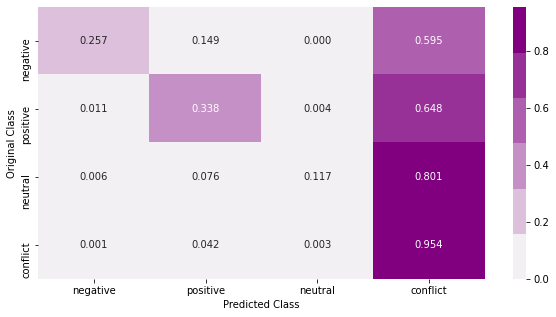

Sum of rows in recall matrix [1. 1. 1. 1.]


In [46]:
plot_confusion_matrix(y_test,  y_pred_polarity, polarity)

## 6. creating a resultant dataframe

In [48]:
def create_result_dataframe(pred_1,pred_2):
  # Calling DataFrame constructor on predicted outputs
  resultant_df = pd.DataFrame(list(zip(pred_1,pred_2)), columns = ["predicted_catagories" , "predicted_polarity"])
  result  = pd.crosstab(resultant_df.predicted_catagories,resultant_df.predicted_polarity ,margins = True , margins_name = "Total")
  result["Ranking"] = ( result.Total/resultant_df.shape[0]) * 5.0 
  result["Negative in %"] = (result.negative/result.Total) * 100
  result["Neutral in %"] = (result.neutral/result.Total) * 100
  result["Positive in %"] = (result.positive/result.Total) * 100
  result["conflict in %"] = (result.conflict/result.Total) * 100
  del result["negative"]
  del result["neutral"]
  del result["positive"]
  del result["Total"]
  del result["conflict"]

  return result

In [49]:
result = create_result_dataframe(y_pred_cat,y_pred_polarity)

In [50]:
result

predicted_polarity,Ranking,Negative in %,Neutral in %,Positive in %,conflict in %
predicted_catagories,,,,,
ambience,0.320197,5.128205,1.282051,87.179487,6.410256
anecdotes/miscellaneous,2.352217,11.518325,3.141361,84.118674,1.221640
food,1.412151,11.627907,0.290698,85.465116,2.616279
price,0.287356,14.285714,0.000000,84.285714,1.428571
service,0.628079,18.300654,1.960784,78.431373,1.307190
Total,5.000000,12.151067,1.888342,83.990148,1.970443


### Observation :
   Above result shows that the Ranking and all Polarities in percentages for all aspect catagories from which we can see that anecdotes/miscellaneous have the highest ranking of 2.35 . and ambience catagory have highest positive polarity